# ART2 demo

Adaptive Resonance Theory Neural Networks
by Aman Ahuja | github.com/amanahuja | twitter: @amanqa


## Overview

In this example:
 * We'll use 10x10 binary ASCII blocks to demonstrate ART2
 * Yes, this is the same data we used for ART1

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [6]:
import os
import numpy as np
from IPython.display import Image


In [7]:
# make sure we're in the root directory

pwd = os.getcwd()
if pwd.endswith('ipynb'):
    os.chdir('..')
    
#print os.getcwd()

## ART2 Architecture

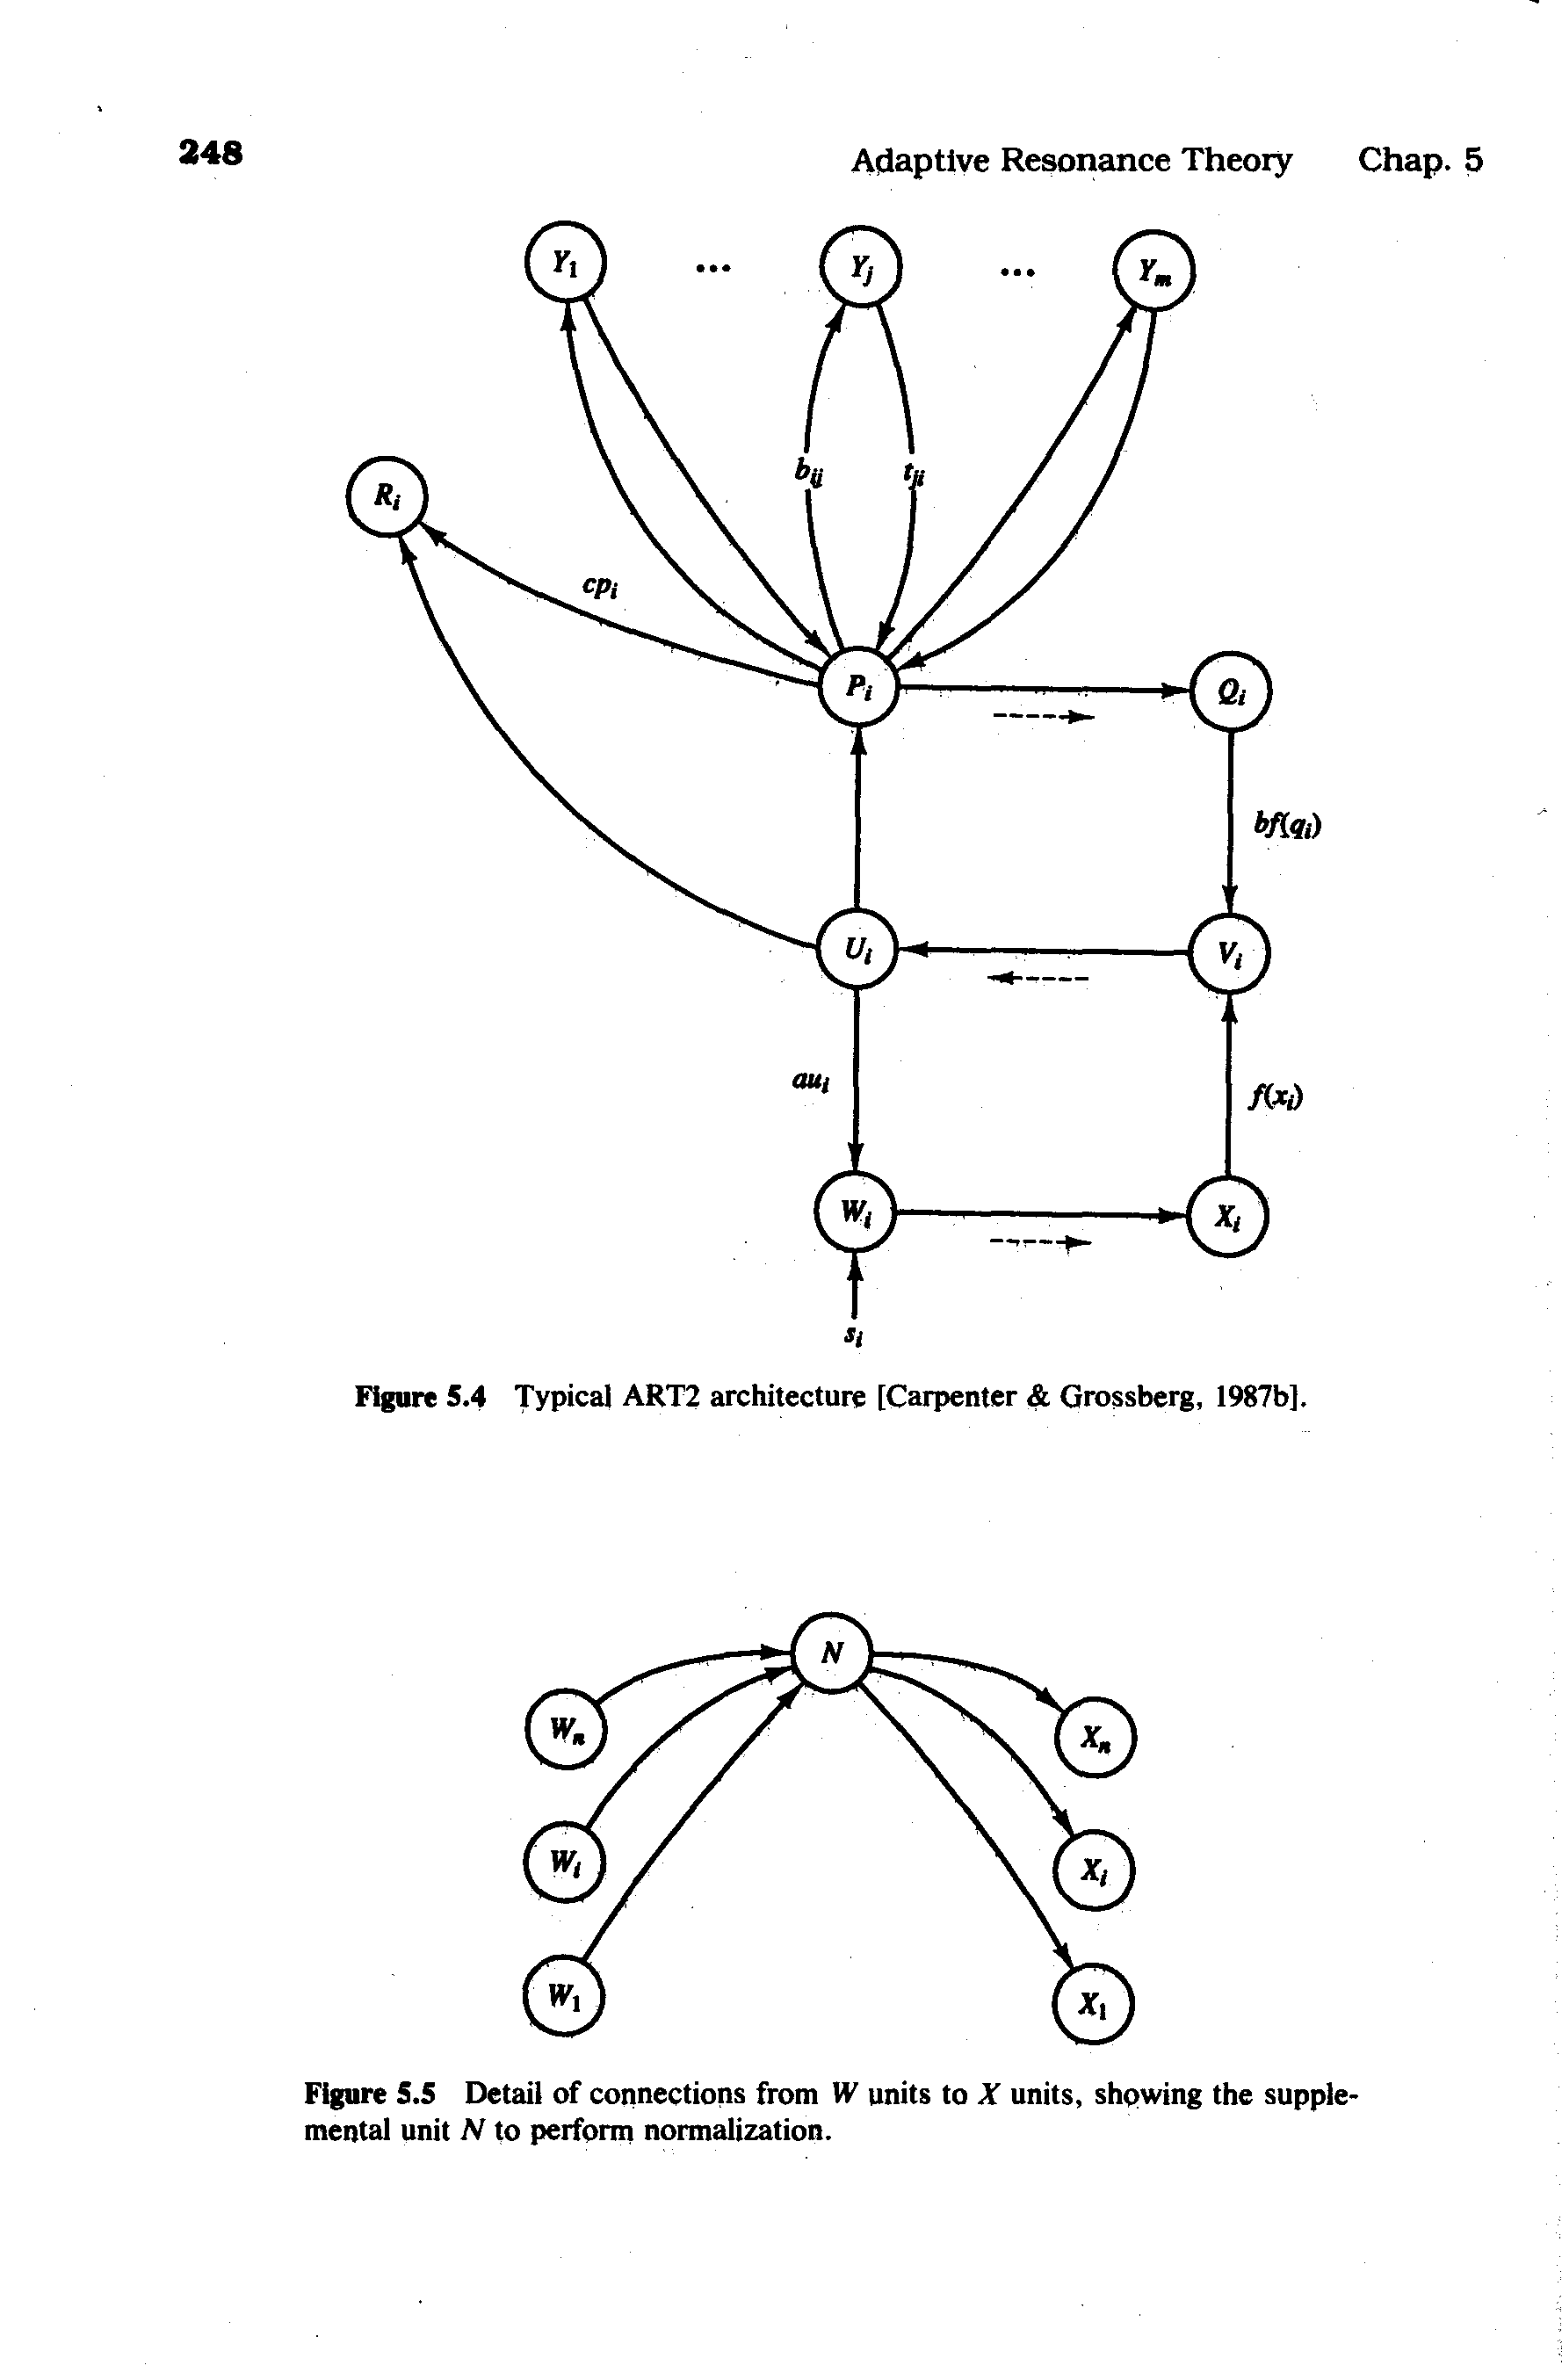

In [10]:
Image("data/architecture_art2.png", width=500)

## Mini ART2 tests

From the book

In [11]:
from ART2 import ART2

# This is my data! 
idata = np.array([0.8, 0.6])

nn = ART2(n=len(idata), m=2, rho=0.9, theta=0.1)
nn.start_logging(to_file=False, to_console=True)
nn.learning_trial(idata = idata)
nn.stop_logging()

    INFO:Start Logging
    INFO:Starting Learning Trial.
   DEBUG:input pattern: [ 0.8  0.6]
   DEBUG:theta: 0.1
   DEBUG:zero'ing activations
    INFO:Updating F1 activations
   DEBUG:	--- debug values --- 
   DEBUG:	ui : [ 0.  0.]
   DEBUG:	wi : [ 0.8  0.6]
   DEBUG:	pi : [ 0.  0.]
   DEBUG:	xi : [ 0.799992  0.599994]
   DEBUG:	qi : [ 0.  0.]
   DEBUG:	vi : [ 0.799992  0.599994]
    INFO:Updating F1 activations
   DEBUG:	--- debug values --- 
   DEBUG:	ui : [ 0.799992  0.599994]
   DEBUG:	wi : [ 8.79992  6.59994]
   DEBUG:	pi : [ 0.799992  0.599994]
   DEBUG:	xi : [ 0.79999927  0.59999945]
   DEBUG:	qi : [ 0.799992  0.599994]
   DEBUG:	vi : [ 8.79991927  6.59993945]
    INFO:candidate selection loop iter start
   DEBUG:	yj: [ 6.99993  6.99993]
   DEBUG:	picking J = 0
    INFO:	Reset is False: Candidate is good.
    INFO:Updating F1 activations
   DEBUG:	--- debug values --- 
   DEBUG:	ui : [ 0.79999927  0.59999945]
   DEBUG:	wi : [ 8.79999273  6.59999455]
   DEBUG:	pi : [ 0.79999927 


#### F2 activations $y_j$

Cluster unit activations are: 

$$y_j = \sum_{i}{b_{ij}}{p_i}$$

given by

`np.dot(art2.Bij.T, art2.pi)`

In [12]:
print nn.Bij.T
print 
print nn.Tji

[[ 7.99999273  5.99999455]
 [ 5.          5.        ]]

[[ 7.99999273  5.99999455]
 [ 0.          0.        ]]


In [13]:
nn.start_logging()

# second pattern
idata = np.array([0.6, 0.8])

nn.learning_trial(idata = idata)
nn.stop_logging()

    INFO:Start Logging
    INFO:Starting Learning Trial.
   DEBUG:input pattern: [ 0.6  0.8]
   DEBUG:theta: 0.1
   DEBUG:zero'ing activations
    INFO:Updating F1 activations
   DEBUG:	--- debug values --- 
   DEBUG:	ui : [ 0.  0.]
   DEBUG:	wi : [ 0.6  0.8]
   DEBUG:	pi : [ 0.  0.]
   DEBUG:	xi : [ 0.599994  0.799992]
   DEBUG:	qi : [ 0.  0.]
   DEBUG:	vi : [ 0.599994  0.799992]
    INFO:Updating F1 activations
   DEBUG:	--- debug values --- 
   DEBUG:	ui : [ 0.599994  0.799992]
   DEBUG:	wi : [ 6.59994  8.79992]
   DEBUG:	pi : [ 0.599994  0.799992]
   DEBUG:	xi : [ 0.59999945  0.79999927]
   DEBUG:	qi : [ 0.599994  0.799992]
   DEBUG:	vi : [ 6.59993945  8.79991927]
    INFO:candidate selection loop iter start
   DEBUG:	yj: [ 9.59989527  6.99993   ]
   DEBUG:	picking J = 0
    INFO:	Reset is False: Candidate is good.
    INFO:Updating F1 activations
   DEBUG:	--- debug values --- 
   DEBUG:	ui : [ 0.59999945  0.79999927]
   DEBUG:	wi : [ 6.59999455  8.79999273]
   DEBUG:	pi : [ 0.599

# [Load data]

 * Data is a series of png images
 * pixelated drawings of letters

In [14]:
# data directory
data_dir = 'data'
print os.listdir(data_dir)

# ASCII data file
data_file = 'ASCII_01.txt'

['lettericons', 'ASCII_01.txt', 'architecture_art2.png']


In [16]:
with open(os.path.join(data_dir, data_file), 'r') as f: 
    raw_data = f.read()
    
# Get data into a usable form here
data = [d.strip() for d in raw_data.split('\n\n')]
data = [d for d in data if d is not '']

data = [d.replace('\n', '') for d in data]

# print the data
data

['XXXXXX...XX...XX...XXXXXX',
 'XXXXXX...X....XX...XXXXXX',
 '.XXXXX...XX...XX...XXXX.X',
 'XXX.XX...XX...XX...XX.XXX',
 'X...X.X.....X.....X.X...X',
 'XX..X...X.......X.X.X...X',
 'X...XXX.X...X...X...X..XX',
 'X..XXXX.X.......X.X.X...X',
 'X...X.X.X...X...X.X.X...X',
 'X...X.X..X..X...X.X.X...X',
 'X...XXX.X...X...X.X.X...X',
 '.XXXXX....X....X.....XXXX',
 '..X.XX....X....X....XXXXX',
 '.XXX.X..XXX...X.X..XX.X.X',
 '..XXXX....X....X.......XX',
 '.XXXXX...XX...XX...XXXXXX',
 '..XXXX....XX...X.....X.XX',
 'XXXXXX..XXX...XXX..XXXXXX',
 'XXX..X...XX...XX...X.XXX.',
 'X.X.XX...XX...XX...X.XXX.',
 'X..XX.X.X...X...X.XXX...X',
 '..X..X...XX...XX...X.XXX.',
 '..XXXX....X....XX......XX',
 '...XXXX...X.....X....XXXX',
 '..XXX.X...X....XX....XXXX',
 '...XXX....X....X....X.XXX',
 '...XXXX...X....XX...XX.XX']

### Helper functions

In [26]:
def format_output(raw):
    out = "{}\n{}\n{}\n{}\n{}".format(
        raw[:5],
        raw[5:10],
        raw[10:15],
        raw[15:20],
        raw[20:25],
    )
    return out

from collections import Counter
import numpy as np

def preprocess_data(data): 
    """
    Convert to numpy array
    Convert to 1s and 0s
    
    """
    # Get useful information from first row
    if data[0]: 
        irow = data[0]

        # get size
        idat_size = len(irow)

        # get unique characters
        chars = False
        while not chars: 
            chars = get_unique_chars(irow, reverse=True)
        char1, char2 = chars

    outdata = []
    idat = np.zeros(idat_size, dtype=bool)

    #convert to boolean using the chars identified
    for irow in data:
        assert len(irow) == idat_size, "data row lengths not consistent"
        idat = [x==char1 for x in irow]
        # note: idat is a list of bools
        idat =list(np.array(idat).astype(int))
        outdata.append(idat)
    
    outdata = np.array(outdata)
    return outdata.astype(int)

def get_unique_chars(irow, reverse=False):
    """
    Get unique characters in data
    Helper function
    ---- 
    reverse:   bool
        Reverses order of the two chars returned
    """
    chars = Counter(irow)
    if len(chars) > 2: 
        raise Exception("Data is not binary")
    elif len(chars) < 2: 
        # first row doesn't contain both chars
        return False, False

    # Reorder here?
    if reverse: 
        char2, char1 = chars.keys()
    else: 
        char1, char2 = chars.keys()
    
    return char1, char2


In [27]:
# Examine one

print format_output(data[0])

XXXXX
X...X
X...X
X...X
XXXXX


## DO

In [24]:
from ART2 import ART2

In [28]:
from collections import defaultdict

# create network

input_row_size = 25
max_categories = 10
rho = 0.20

network = ART2(n=input_row_size, m=max_categories, rho=rho)

# preprocess data
data_cleaned = preprocess_data(data)

# shuffle data? 
np.random.seed(1221)
np.random.shuffle(data_cleaned)

# learn data array, row by row
for row in data_cleaned:
    network.learn(row)

print
print "n rows of data:         ", len(data_cleaned)
print "max categories allowed: ", max_categories
print "rho:                    ", rho

print "n categories used:      ", network.n_cats
print


# output results, row by row
output_dict = defaultdict(list)

for row, row_cleaned in zip (data, data_cleaned): 
    pred = network.predict(row_cleaned)
    output_dict[pred].append(row)

for k,v in output_dict.iteritems():
    print "category: {}, ({} members)".format(k, len(v))
    print '-'*20
    for row in v: 
        print format_output(row)
        print
    print 
#   \  print "'{}':{}".format(
#         row, 
#         network.predict(row_cleaned))
    

AttributeError: 'ART2' object has no attribute 'learn'